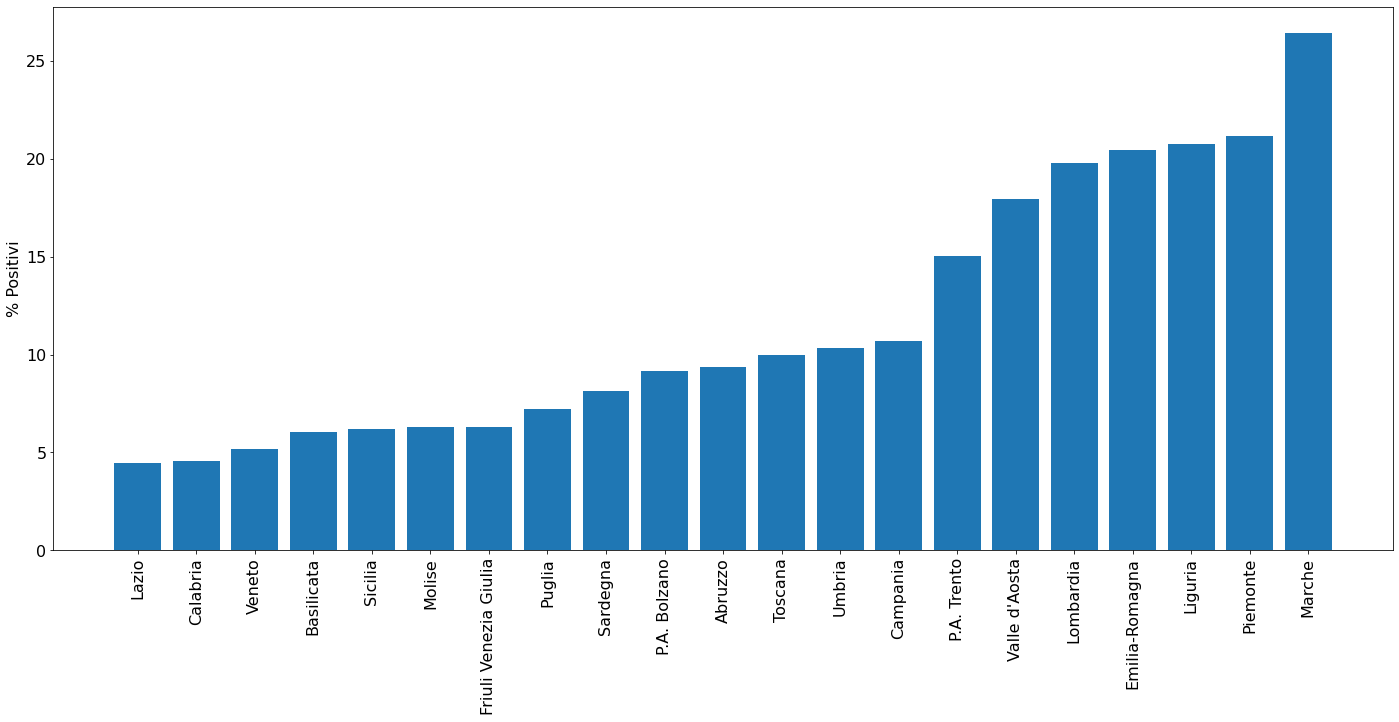

In [1]:
import opendata_reader as odr
import chart_plotter as cp
import matrix_builder as mb
import numpy
from matplotlib import dates
from matplotlib.dates import DayLocator, HourLocator, DateFormatter, drange
json_filename = "../../../COVID-19/dati-json/dpc-covid19-ita-regioni.json"
json_data = odr.read_json_file(json_filename)

# get the data in a structured form
[indexmap_date, indexmap_region, matrix] = odr.build_matrix(json_data)

concentration_matrix = mb.build_concentration_matrix(matrix, 60)
daily_matrix = mb.build_daily_matrix(matrix)
daily_concentration_matrix = mb.build_concentration_matrix(daily_matrix, 20)

list_regions = list(indexmap_region.keys())
list_dates = dates.datestr2num([ d for d in indexmap_date.keys()])

cp.plot_regional_charts( list_dates, list_regions, matrix, concentration_matrix,"../img/","regionale") 
cp.plot_national_charts( list_dates, list_regions, concentration_matrix, matrix,"../img/","nazionale") 
cp.plot_regional_daily_charts(list_dates, list_regions, daily_matrix, daily_concentration_matrix,"../img/", "daily")
cp.plot_regional_averages(list_regions, concentration_matrix,"../img/", "avg")